<h1> Cat and Dog Classifier (My first Convolutional Neural Net)</h1>

In this first ConvNet we try to predict whether there is a cat or a dog in a given picture. Therefore we use a dataset provided by kaggle.

The image data will resized (150x150) and split into batches of 16 elements each. This is done with the ImageDataGenerator class from keras. Afterwards I created a model with 3 convolutional layers.

Dataset: https://www.kaggle.com/c/dogs-vs-cats/data

Good Tutorial: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

from keras import backend as K
# K.tensorflow_backend._get_available_gpus()
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img # Image Preprocessing
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
''' Constants: '''

TRAIN_DIR = '/Users/basti/Documents/MLDatasets/CatsDogs/dogscats/train'
TEST_DIR = '/Users/basti/Documents/MLDatasets/CatsDogs/dogscats/valid'

BATCH_SIZE = 16

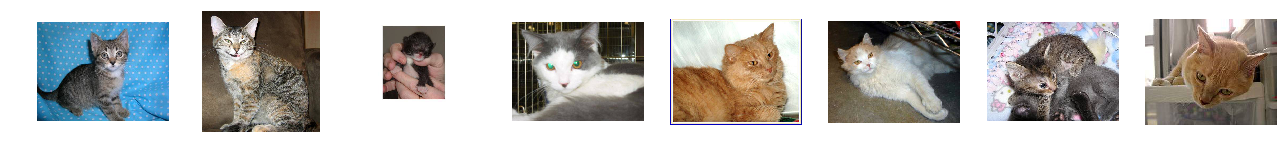

In [3]:
filelist = os.listdir(TRAIN_DIR+'/cats/')

plt.figure(num=None, figsize=(20, 2), dpi=80)
for i,file in enumerate(filelist[:8]):
    plt.subplot(1,8,i+1)
    img = load_img(TRAIN_DIR+'/cats/'+file)    # this is a PIL image
    plt.imshow(img)
    plt.axis('off')

# x = img_to_array(img)            # this is a Numpy array with shape (3, 150, 150) # not sure about the 150x150. But doesn't matter.
# x = x.reshape((1,) + x.shape)    # this is a Numpy array with shape (1, 3, 150, 150) 

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,               # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=BATCH_SIZE,
        class_mode='binary')     # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


my_test_batch_index: 0
batch images shape: (16, 150, 150, 3)
{'cats': 0, 'dogs': 1}


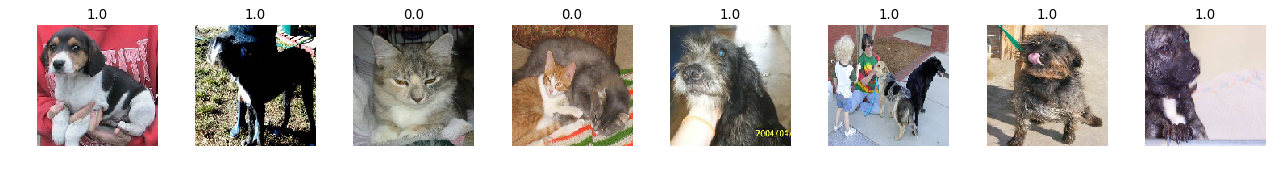

In [6]:
''' Plot 8 images after they've passed the ImageDataGenerator '''

# A Batch is a tuple with two Elements. 0: Data (Images) 1: Labels

my_test_batch_index = validation_generator.batch_index    # get index of current batch
print("my_test_batch_index:", my_test_batch_index)

my_test_batch = validation_generator.next()               # get the current batch (16 elements)

my_test_batch_images = my_test_batch[0]                   # get images [0]
my_test_batch_labels = my_test_batch[1]                   # get labels [1]
print("batch images shape:",my_test_batch_images.shape)   # print batch shape
#print("labels:",my_test_batch_labels)                    # print labels
print(validation_generator.class_indices)

plt.figure(num=None, figsize=(20, 2), dpi=80)
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(my_test_batch_images[i])
    plt.title( my_test_batch_labels[i])
    plt.axis('off')

In [7]:
''' 3 Convolutional Layers '''

# 32:     filters: The dimensionality of the output space (i.e. the number of output filters in the convolution).
# (3, 3): kernel_size: An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3))) # picture x,y,dim
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

On top of it we stick two fully-connected layers. We end the model with a single unit and a sigmoid activation, which is perfect for a binary classification. To go with it we will also use the binary_crossentropy loss to train our model.

In [8]:
model.add(Flatten())                # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))                 # output neuron (1 because of binary classification)
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# NOTE: Metrics are not used when trainnig the model. So only the loss function determines the direction of the weights.

In [9]:
model.load_weights('myWeights.h5')

In [221]:
model.load_weights('myWeights.h5')        # just to be save load my old pre trained weights
training_history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // BATCH_SIZE,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800 // BATCH_SIZE)
model.save_weights('myWeights.h5')        # always save weights after training
# epochs=50

Epoch 1/10
125/125 [==============================] - 95s 762ms/step - loss: 0.5889 - acc: 0.7005 - val_loss: 0.4953 - val_acc: 0.7750
Epoch 2/10
125/125 [==============================] - 98s 780ms/step - loss: 0.5871 - acc: 0.6890 - val_loss: 0.5480 - val_acc: 0.6937
Epoch 3/10
125/125 [==============================] - 93s 744ms/step - loss: 0.5972 - acc: 0.6890 - val_loss: 0.5083 - val_acc: 0.7312
Epoch 4/10
125/125 [==============================] - 89s 715ms/step - loss: 0.5794 - acc: 0.7070 - val_loss: 0.5025 - val_acc: 0.7638
Epoch 5/10
125/125 [==============================] - 94s 748ms/step - loss: 0.5659 - acc: 0.7210 - val_loss: 0.5059 - val_acc: 0.7588
Epoch 6/10
125/125 [==============================] - 90s 717ms/step - loss: 0.5283 - acc: 0.7415 - val_loss: 0.5475 - val_acc: 0.7538
Epoch 7/10
125/125 [==============================] - 94s 754ms/step - loss: 0.5492 - acc: 0.7300 - val_loss: 0.4946 - val_acc: 0.7725
Epoch 8/10
125/125 [==============================] - 9

In [10]:
''' Plot Loss over time: '''

val_loss_hist = training_history.history['val_loss'] # val_loss is loss of the validation dataset.
loss_hist     = training_history.history['loss']     # training loss

plt.plot(range(len(val_loss_hist)), val_loss_hist,label="Validation Loss")
plt.plot(range(len(loss_hist)), loss_hist,label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: name 'training_history' is not defined

In [12]:
''' Plot the Model and save it to file: '''

# get the next file index:
i = 0
while os.path.exists("model_plots/model%s.png" % i):
    i += 1
    
# save model as png:
plot_model(model, to_file='model_plots/model%s.png' % i)

In [16]:

# my_test_image = np.expand_dims(my_test_images[0], axis=0) # add a dimension so this works as an imput
# print(validation_generator.class_indices)
# print(validation_generator.classes[950:1050])

# prediction for a test batch from the validation set.
print("One Batch:",model.test_on_batch(my_test_batch[0], my_test_batch[1]))
print(model.metrics_names)

# prediction for full validation set.
print("Complete Validation set:",model.evaluate_generator(validation_generator))
print(model.metrics_names)

[0.92030674, 0.4375]
['loss', 'acc']
[0.50888371515274045, 0.748]
['loss', 'acc']


In [44]:
validation_imgs_predicted = model.predict_generator(validation_generator)


In [45]:
diff = np.round(validation_imgs_predicted,0).reshape(-1) - validation_generator.classes
print("Accuracy by hand: ",1 - np.count_nonzero(diff) / validation_generator.classes.shape[0])

Accuracy by hand:  0.503
